<a href="https://colab.research.google.com/github/chetan-ade/FYP/blob/master/WindSpeed_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import datetime
from datetime import date

In [41]:
location = '21.238611,73.350000'
filename = location+"_preprocessed.csv"
df = pd.read_csv(filename)
df.head()

Unnamed: 0        date  day  month WindDir  WindspeedKmph
0           0  2008-07-01    1      7      SW             17
1           1  2008-07-02    2      7      SW             21
2           2  2008-07-03    3      7      SW             18
3           3  2008-07-04    4      7      SW             17
4           4  2008-07-05    5      7      SW             18

In [42]:
os.remove(filename)

In [3]:
data = pd.DataFrame(
    columns=['day', 'month', 'WindSpeed']
)

In [4]:
data['day'] = df['day']
data['month'] = df['month']
data['WindSpeed'] = df['WindspeedKmph']
data.head()

day  month  WindSpeed
0    1      7         17
1    2      7         21
2    3      7         18
3    4      7         17
4    5      7         18

In [5]:
data.describe()

day        month    WindSpeed
count  4291.000000  4291.000000  4291.000000
mean     15.727336     6.556048    11.789093
std       8.799939     3.476235     4.596647
min       1.000000     1.000000     3.000000
25%       8.000000     3.000000     8.000000
50%      16.000000     7.000000    11.000000
75%      23.000000    10.000000    15.000000
max      31.000000    12.000000    36.000000

In [6]:
x = data.iloc[:, :-1]
y = data['WindSpeed']

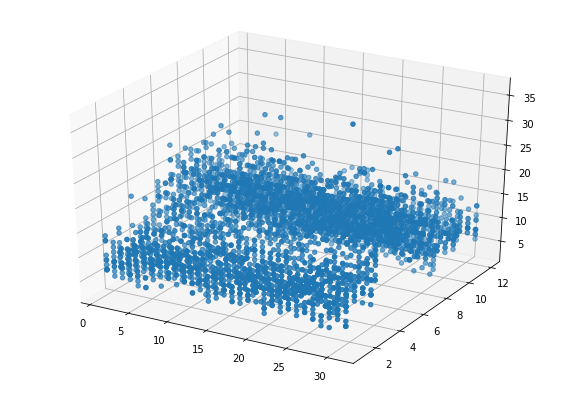

In [7]:
fig = plt.figure()
fig.set_size_inches(10, 7)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=x.day, ys=x.month, zs=y)

(array([3.240e+02, 1.353e+03, 1.075e+03, 7.620e+02, 4.820e+02, 1.980e+02,
        7.800e+01, 1.400e+01, 4.000e+00, 1.000e+00]),
 array([ 3. ,  6.3,  9.6, 12.9, 16.2, 19.5, 22.8, 26.1, 29.4, 32.7, 36. ]),
 <a list of 10 Patch objects>)

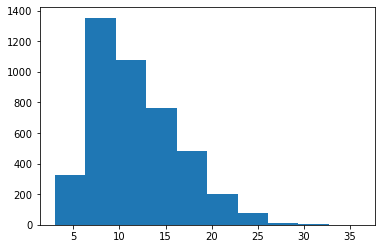

In [8]:
plt.hist(y)

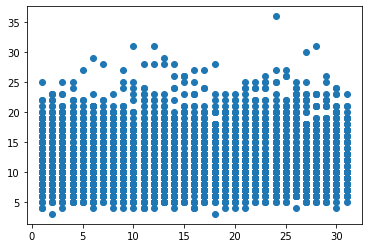

In [9]:
plt.scatter(x.day, y)
plt.rcParams["figure.figsize"] = (5,10)
plt.show()

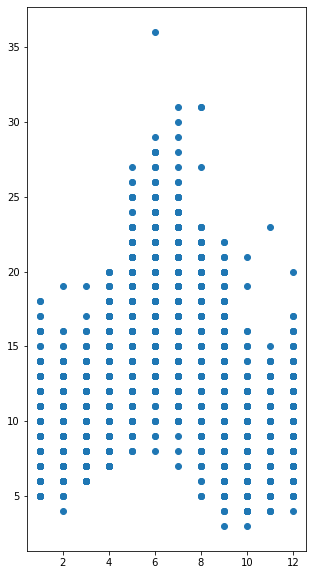

In [10]:
plt.scatter(x.month, y)
plt.rcParams["figure.figsize"] = (7,5)
plt.show()

In [11]:
data

day  month  WindSpeed
0       1      7         17
1       2      7         21
2       3      7         18
3       4      7         17
4       5      7         18
...   ...    ...        ...
4286   26      3         10
4287   27      3          9
4288   28      3         12
4289   29      3         11
4290   30      3          9

[4291 rows x 3 columns]

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=4)

In [13]:
svr = SVR(kernel='rbf', gamma='auto', C=100.0, epsilon=2.2, verbose=1)

In [14]:
svr.fit(xtrain, ytrain)

[LibSVM]

SVR(C=100.0, cache_size=200, coef0=0.0, degree=3, epsilon=2.2, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=1)

In [15]:
p = svr.predict(xtest)
p

array([11.20030621, 16.80034611,  9.20000124, 10.19985696, 11.96303472,
       11.20002582,  8.44135903, 12.20042131,  9.20005371,  8.19975628,
        9.06438075, 10.79984425, 10.19971691,  8.2000854 , 18.19961321,
       18.7995516 , 17.79972482, 17.90956968,  9.19999841, 10.19989455,
        8.80033382, 17.19999668,  9.20026155, 10.19975125,  9.80043476,
       14.8000657 ,  9.79985779,  7.200411  , 18.43280661, 18.52312607,
       12.20031208,  9.20030168, 13.20009672,  8.26635255,  9.20041271,
        8.79955537, 18.19961321, 11.19983985,  9.80020636, 18.79980966,
        8.19984584,  9.52969854, 11.19983985, 15.79952206, 11.20026694,
        9.19956162,  9.06438075,  9.80044495, 17.20027693, 18.20518719,
        9.20044449,  7.20031615,  9.19999841, 10.19958971, 11.19986964,
        7.77624825,  8.26635255,  9.19979526,  9.19956162,  9.19999841,
       12.79989569,  9.75027728, 10.80008501,  8.80021865,  8.20015531,
       10.19969041, 10.19958971,  8.19965643,  9.20010591, 15.79

In [16]:
mean_squared_error(ytest, p)

8.960672336969965

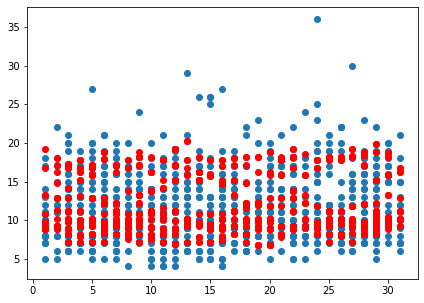

In [17]:
plt.scatter(xtest.day, ytest)
plt.scatter(xtest.day, p, color='red')
plt.show()

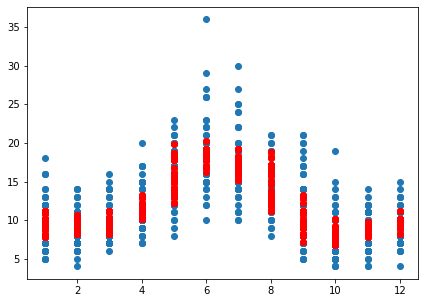

In [18]:
plt.scatter(xtest.month, ytest,)
plt.scatter(xtest.month, p, color='red')
plt.show()

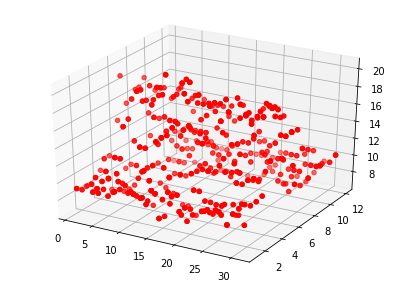

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=xtest.day, ys=xtest.month, zs=p, c='red')

(array([ 63., 245., 190.,  79.,  57.,  24.,  45.,  60.,  82.,  14.]),
 array([ 6.79953205,  8.13958234,  9.47963264, 10.81968293, 12.15973322,
        13.49978351, 14.8398338 , 16.17988409, 17.51993439, 18.85998468,
        20.20003497]),
 <a list of 10 Patch objects>)

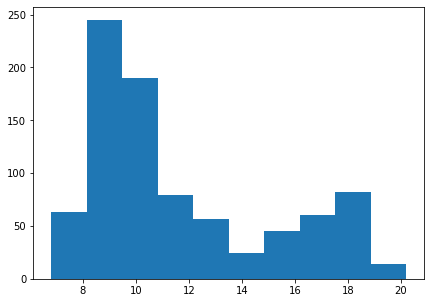

In [20]:
plt.hist(p)

In [21]:
scaler = MinMaxScaler(feature_range=(4, 40))

In [22]:
pred = p.reshape(-1, 1)

In [23]:
pred = scaler.fit_transform(pred)
pred

array([[15.82253163],
       [30.86685032],
       [10.44877966],
       [13.13485841],
       [17.87157611],
       [15.82177837],
       [ 8.41071292],
       [18.50930718],
       [10.44892064],
       [ 7.76165526],
       [10.08443979],
       [14.74670407],
       [13.13448217],
       [ 7.76253943],
       [34.62593429],
       [36.23764857],
       [33.55164759],
       [33.8467421 ],
       [10.44877207],
       [13.13495938],
       [ 9.37508659],
       [31.94049813],
       [10.44947899],
       [13.13457442],
       [12.0618241 ],
       [25.49316432],
       [12.0602741 ],
       [ 5.0769478 ],
       [35.2524005 ],
       [35.49504069],
       [18.50901375],
       [10.44958678],
       [21.19490153],
       [ 7.94056389],
       [10.44988506],
       [ 9.37299532],
       [34.62593429],
       [15.82127878],
       [12.06121052],
       [36.23834185],
       [ 7.76189584],
       [11.33450036],
       [15.82127878],
       [28.1781702 ],
       [15.82242614],
       [10

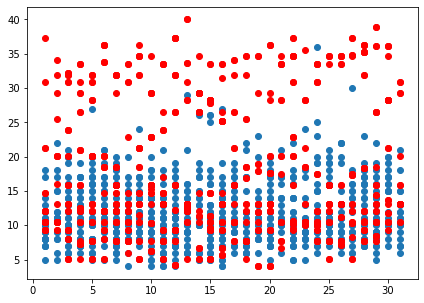

In [24]:
plt.scatter(xtest.day, ytest)
plt.scatter(xtest.day, pred, color='red')
plt.show()

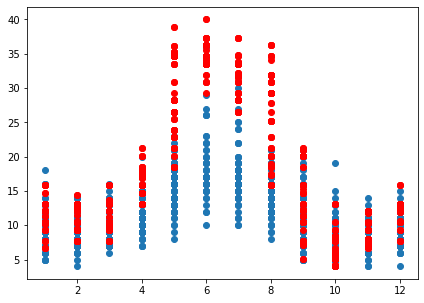

In [25]:
plt.scatter(xtest.month, ytest,)
plt.scatter(xtest.month, pred, color='red')
plt.show()

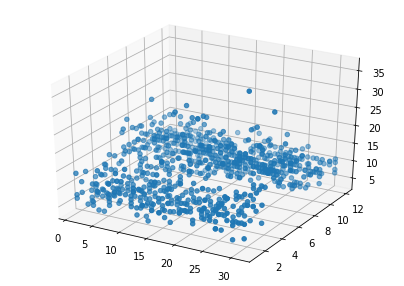

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=xtest.day, ys=xtest.month, zs=ytest)

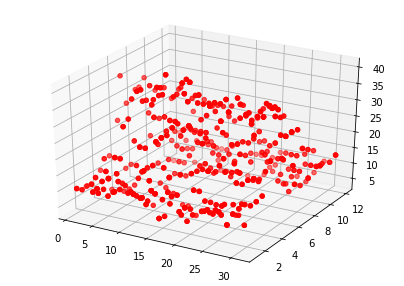

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=xtest.day, ys=xtest.month, zs=pred, c='red')

(array([134., 290., 170., 127.,  93.,  33.,   7.,   3.,   1.,   1.]),
 array([ 4. ,  7.2, 10.4, 13.6, 16.8, 20. , 23.2, 26.4, 29.6, 32.8, 36. ]),
 <a list of 10 Patch objects>)

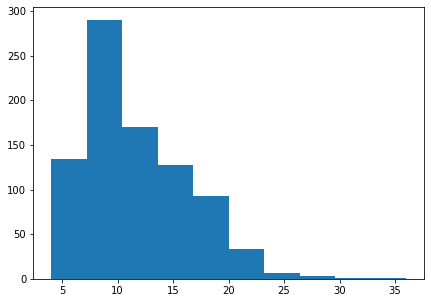

In [28]:
plt.hist(ytest)

(array([ 63., 245., 190.,  79.,  57.,  24.,  45.,  60.,  82.,  14.]),
 array([ 4. ,  7.6, 11.2, 14.8, 18.4, 22. , 25.6, 29.2, 32.8, 36.4, 40. ]),
 <a list of 10 Patch objects>)

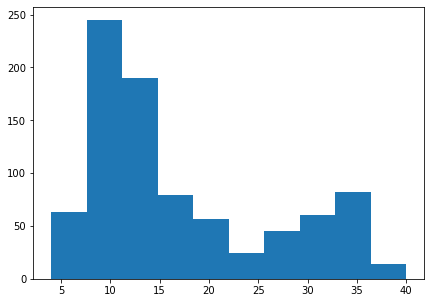

In [29]:
plt.hist(pred)

In [30]:
pred = pred.round()
pred = pred.astype('int32')
pred

array([[16],
       [31],
       [10],
       [13],
       [18],
       [16],
       [ 8],
       [19],
       [10],
       [ 8],
       [10],
       [15],
       [13],
       [ 8],
       [35],
       [36],
       [34],
       [34],
       [10],
       [13],
       [ 9],
       [32],
       [10],
       [13],
       [12],
       [25],
       [12],
       [ 5],
       [35],
       [35],
       [19],
       [10],
       [21],
       [ 8],
       [10],
       [ 9],
       [35],
       [16],
       [12],
       [36],
       [ 8],
       [11],
       [16],
       [28],
       [16],
       [10],
       [10],
       [12],
       [32],
       [35],
       [10],
       [ 5],
       [10],
       [13],
       [16],
       [ 7],
       [ 8],
       [10],
       [10],
       [10],
       [20],
       [12],
       [15],
       [ 9],
       [ 8],
       [13],
       [13],
       [ 8],
       [10],
       [28],
       [10],
       [13],
       [12],
       [13],
       [10],
       [ 5],
       [ 7],

In [31]:
mean_squared_error(ytest, pred)

74.64493597206054

In [32]:
pred_data = pd.DataFrame(
    columns=['day', 'month', 'Pred_windSpeed']
)

In [33]:
pred_data['day'] = xtest['day']
pred_data['month'] = xtest['month']
pred_data['Pred_windSpeed'] = pred
pred_data

day  month  Pred_windSpeed
1881   25      8              16
3675   24      7              31
1683    8      2              10
4139   31     10              13
3579   19      4              18
...   ...    ...             ...
3512   11      2               9
3958    3      5              24
2854   24      4              17
1423   24      5              34
3662   11      7              34

[859 rows x 3 columns]

In [34]:
last_date = df['date'].iloc[-1]
last_date = datetime.datetime.strptime(last_date, "%Y-%m-%d").date()

pred_date = []
for i in range(1, 91):
    pred_date.append(last_date + datetime.timedelta(days=i))

pred_input = [[] for i in range(90)]
i = 0
for j in pred_date:
    pred_input[i].append(j.day)
    pred_input[i].append(j.month)
    i += 1

In [35]:
sample = pd.DataFrame(
    columns=['day', 'month'],
    data=pred_input
)
sample

day  month
0    31      3
1     1      4
2     2      4
3     3      4
4     4      4
..  ...    ...
85   24      6
86   25      6
87   26      6
88   27      6
89   28      6

[90 rows x 2 columns]

In [36]:
sample_p = svr.predict(sample)
sample_p

array([11.19992178, 10.79973205, 11.27713767, 11.20014737, 11.19963295,
       10.20038487, 10.79988813, 10.79971149, 10.20017088, 10.79984425,
       11.20028193, 11.62629717, 11.19986964, 10.20045063, 10.79973199,
       10.80008501, 10.79987173, 11.20027837, 11.61209272, 11.96303472,
       11.89245284, 11.80023391, 12.79989569, 12.1999763 , 11.80045101,
       11.19986833, 11.20015034, 11.79971231, 12.12529204, 12.20042131,
       13.19982885, 14.20044932, 14.80000107, 14.19992841, 15.200314  ,
       12.79979224, 12.20023722, 12.20005829, 13.79970226, 13.20036463,
       13.79978123, 14.19990047, 15.19989823, 15.79968537, 15.20030277,
       15.79963956, 15.20023042, 15.17841116, 14.8000657 , 15.01625707,
       16.20008463, 15.79960799, 18.20518719, 18.20032871, 17.79988683,
       18.20025988, 17.79960283, 18.20029971, 18.43280661, 19.799874  ,
       18.73326963, 16.80010124, 19.19952127, 16.20038185, 16.80035097,
       17.79970023, 16.80024738, 17.34271493, 17.19957345, 17.80

In [37]:
sample_p = sample_p.round()
sample_p = sample_p.astype('int32')

In [38]:
location = '21.238611,73.350000'
filename = location+".csv"
pred_data = pd.read_csv(filename)
pred_data['speed'].iloc[-90:] = sample_p
pred_data.tail()

Unnamed: 0        date  direction  speed
4376          85  2020-06-24        203   18.0
4377          86  2020-06-25        221   18.0
4378          87  2020-06-26        229   18.0
4379          88  2020-06-27        219   19.0
4380          89  2020-06-28        207   19.0

In [39]:
pred_data.to_csv(filename)